# Python: collusion with Bertrand competition

In this notebook we consider collusion with Bertrand competition. However, we do not specify a demand function. We start from consumers' utility and then derive demand from that.

With Bertrand competition it turns out that defining the best response numerically is a bit tricky...

In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

## utility structure and demand

Assume that a consumer buys either one product or none at all. A consumer of type $n$ values buying a product at price $p$ at $n-p$. Her outside option is normalized at 0. Hence, she only buys the good if $n-p \geq 0$.

Total demand is then given by all consumers with $n \geq p$.

In [2]:
def u(p,n): # utility for consumer who values good at n
    return n-p

consumer_types = arange(0.0,1.01,0.01) # 100 consumers with n varying between 0 and 1

def buy(p,n):
    if u(p,n) >= 0:
        buy = 1.0
    else:
        buy = 0.0
    return buy

def total_demand(p): # total demand equals the sum of demands of consumers n for all consumer_types
    demand_vector = [buy(p,n)/len(consumer_types) for n in consumer_types]
    return sum(demand_vector)
    


## profits and reaction functions

We consider a duopoly with firms 1 and 2. Consumers buy from the cheapest firm or choose a firm randomly if both charge the same price. Firm $i$ has constant marginal cost of production $c_i$ and no fixed cost.

Let $x(p)$ denote total demand at price $p$. Then profits equal:

$$
\pi_i(p_i,p_j) = 
\begin{cases}
0 & \text{ if } p_i > p_j \\
0.5*x(p_i)(p_i-c_i) &\text{ if } p_i = p_j \\
x(p_i)(p_i-c_i) &\text{ if } p_i < p_j
\end{cases}
$$

With this profit function, firm $i$ chooses $p_i$ optimally, given $p_j$. Analytically, this implies for $p_j \in \langle c_1, p_1^m \rangle$ setting $p_i = p_j -\varepsilon$ for $\varepsilon > 0$ small. 

* Why can't we use this here?
* Give the intuition for the reaction function specified below; why is it not optimal?

In [19]:
def profit(p1,p2,c1):
    if p1 > p2:
        profits = 0
    elif p1 == p2:
        profits = 0.5*total_demand(p1)*(p1-c1)
    else:
        profits = total_demand(p1)*(p1-c1)
    return profits

def reaction(p2,c1):
    if p2 > c1:
        reaction = c1+0.8*(p2-c1)
    else:
        reaction = c1
    return reaction
    


## equilibrium

We define the Bertrand equilibrium as a fixed point to a mapping from $p_1,p_2$ to the optimal response of firm 1 and 2 to these values of $p_1,p_2$. This is done in the same way as in the Cournot file.

We specify symmetric firms $c_1=c_2=0.0$ and give initial guess $p_0$ for equilibrium prices.

In [20]:
def vector_reaction(p,param): # vector param = (c1,c2)
    return array(p)-array([reaction(p[1],param[0]),reaction(p[0],param[1])])

param = [0.0,0.0] # c1 = c2 =0
p0 = [0.5, 0.5] # initial guess: p1 = p2 = 0.5

ans = optimize.fsolve(vector_reaction, p0, args = (param))
print ans


[  4.94065646e-324   4.94065646e-324]


The outcome is what we would expect: $p_1 = p_2 = c_1 = c_2 = 0.0$. Bertrand competition with homogeneous goods and constant average costs leads to price equal marginal costs.

## collusion

Now we are going to see whether firms can collude on a price $p$. As with Cournot, we focus on the symmetric case where $c_1 = c_2 =c$ and $p_1 = p_2 =p$.

With Cournot we defined the deviation (from collusion) profit using the firm's optimal response. 

* Why don't we use this here?
* Why is the optimal deviation profit correct? 

In [21]:
def collusion_profits(p,c,delta): # we only do this for the symmetric case: c1 = c2 = c
    profits = profit(p,p,c)
    ans = optimize.fsolve(vector_reaction, p0, args = ([c,c]))
    if profits >= (1-delta)*2*profits+delta*profit(ans[0],ans[1],c):
        industry_profits = 2*profits
    else:
        industry_profits = 0
    return industry_profits


## maximum collusion profits

To see which prices can be sustained as collusion profits and to see which price maximizes collusion profits, let's plot collusion profits as a function of $p$. Here we work with constant marginal costs equal to $c = 0.2$.

The red line plots collusion profits for $\delta_1 = 0.8$ and the blue line for $\delta_2 = 0.4$.

* Why is the blue line (if you can see it...) horizontal at 0?
* What is the profit maximizing price with the red line?
* How does this compare to the condition on collusion derived in the lecture?

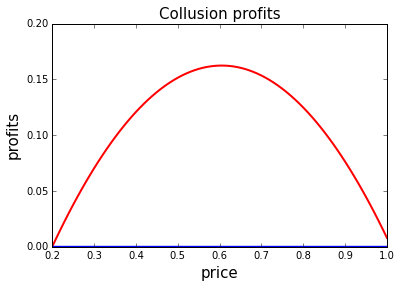

In [22]:
c = 0.2
range_p = arange(0.0,1.01,0.01)
delta1 = 0.8
delta2 = 0.4

range_profits = [collusion_profits(p,c,delta1) for p in range_p]
range_profits_2 = [collusion_profits(p,c,delta2) for p in range_p]

plt.clf()
plt.plot(range_p, range_profits,'-', color = 'r', linewidth = 2)
plt.plot(range_p, range_profits_2,'-', color = 'b', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("price",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(c,1.0)
plt.ylim(0.0,0.2)
plt.savefig('collusion_Bertrand.png')

## welfare

Finally, let's consider total welfare as a function of price. 

* At which price $p$ is welfare maximized? Why?

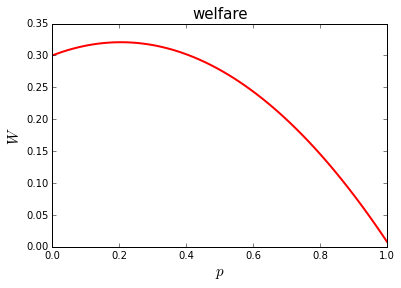

In [23]:
def welfare(p):
    welfare = sum([u(c,n)*buy(p,n)/len(consumer_types) for n in consumer_types])
    return welfare

range_welfare = [welfare(p) for p in range_p]

plt.clf()
 
plt.plot(range_p, range_welfare,'-', color = 'r', linewidth = 2)
plt.title("welfare",fontsize = 15)
plt.xlabel("$p$",fontsize = 15)
plt.ylabel("$W$",fontsize = 15)
plt.xlim(0.0,1.0)
plt.savefig('welfare.png')